## <center>**Рубежный контроль №1**</center>

### Щепетов Дмитрий ИУ5-62Б

In [291]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Загрузим данные в data и определим вид изначальных данных

In [292]:
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

Создадим DataFrame и выведем в более удобном виде для понимания

In [293]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

Проверим датасет на наличие пропусков

In [294]:
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


Определим типы данных, с которыми будем работать

In [295]:
print(df.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int32
dtype: object


Построим корреляционную матрицу с исходными данными, чтобы определить, с чем лучше работать

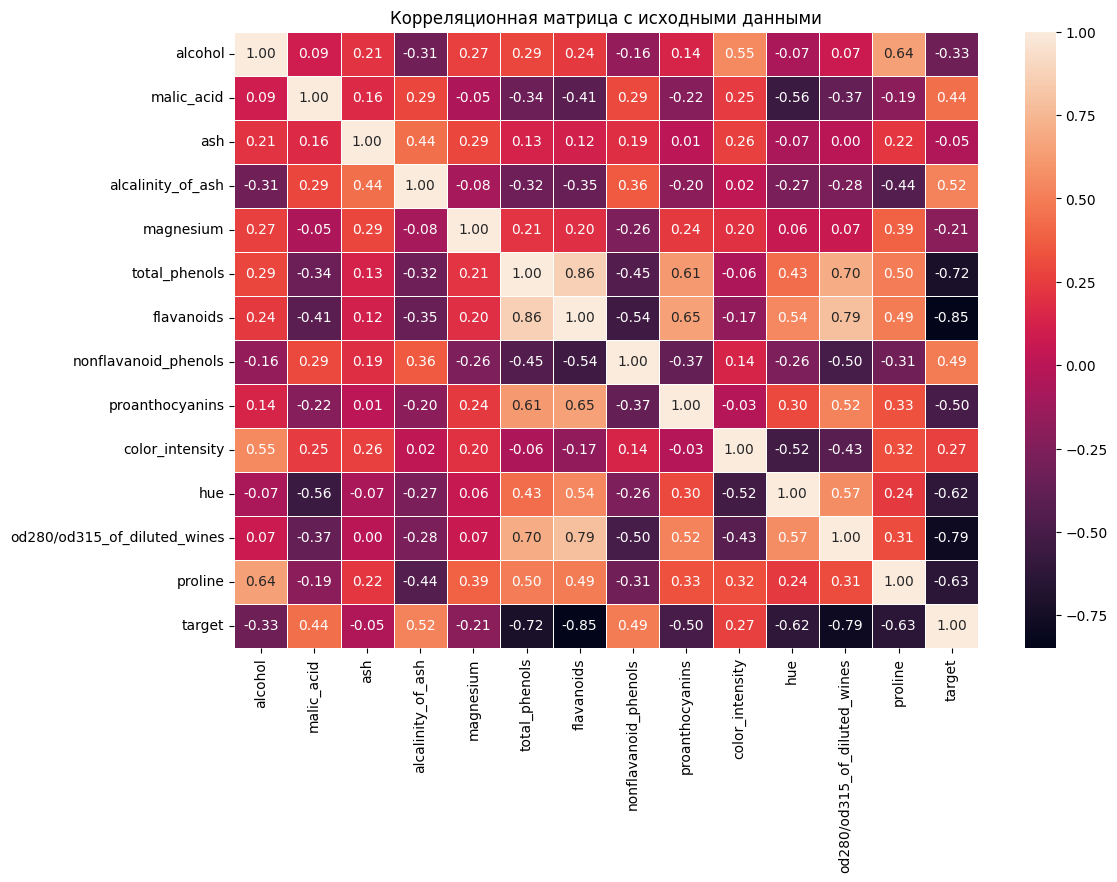

In [296]:
# Вычисление корреляций
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица с исходными данными')
plt.show()

# Масштабирование данных

Для произведения масштабирования данных возьмем признак 'Alcohol'

Также выведем признаки 'alcohol' и 'Alcohol_scaled' для наглядности

In [297]:
scaler = StandardScaler()
df['Alcohol_scaled'] = scaler.fit_transform(df[['alcohol']])

print(print(df[['alcohol', 'Alcohol_scaled']]))

     alcohol  Alcohol_scaled
0      14.23        1.518613
1      13.20        0.246290
2      13.16        0.196879
3      14.37        1.691550
4      13.24        0.295700
..       ...             ...
173    13.71        0.876275
174    13.40        0.493343
175    13.27        0.332758
176    13.17        0.209232
177    14.13        1.395086

[178 rows x 2 columns]
None


Выведем все имеющиеся признаки/колонки

In [298]:
print(df.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target', 'Alcohol_scaled'],
      dtype='object')


Согласно заданию нужно выбрать категориальный признак. Однако в датасете load_wine нет категориальных признаков, одни числовые значения

Поэтому было принято заменить Значения признака target (0,1,2) на значения признака target_names (class_0, class_1, class_2), который нельзя вывести вместе с датасетом 

В переменную 'target_names_df'создаем DataFrame с признаком target_names (class_0, class_1, class_2) и после этого заменим target на значения target_names

In [299]:

target_names_df = pd.DataFrame(data=data.target_names, columns=['target_names'])
target_names_df
# Добавляем столбец с именами классов к DataFrame 'df'
df['target'] = target_names_df.loc[df['target'], 'target_names'].values

print(df[['target']])

      target
0    class_0
1    class_0
2    class_0
3    class_0
4    class_0
..       ...
173  class_2
174  class_2
175  class_2
176  class_2
177  class_2

[178 rows x 1 columns]


## Преобразование категориальных признаков в количественные

Для выполнения преобразования категориальных признаков в количественные двумы способами будем использовать обновленный признак 'target', который теперь является категориальным

### Label Encoding 

Признак 'target_label_encoded' будет представлять количественный признак признака 'target'

In [300]:
label_encoder = LabelEncoder()
df['target_label_encoded'] = label_encoder.fit_transform(df['target'])
print(df[['target', 'target_label_encoded']])

      target  target_label_encoded
0    class_0                     0
1    class_0                     0
2    class_0                     0
3    class_0                     0
4    class_0                     0
..       ...                   ...
173  class_2                     2
174  class_2                     2
175  class_2                     2
176  class_2                     2
177  class_2                     2

[178 rows x 2 columns]


### One Hot Encoding

'target_one_hot_class_0', 'target_one_hot_class_1' и 'target_one_hot_class_2' станут количественными признаками

Если образец вина принадлежит признаку, то он выводит 'True', иначе 'False'. То есть способом One Hot Encoding получаем 3 признака, которые представляют данные в виде булевых данных True и False

In [301]:
# One Hot Encoding
df = pd.get_dummies(df, columns=['target'], prefix='target_one_hot')
# print(df.columns)
print(df[['target_label_encoded', 'target_one_hot_class_0', 'target_one_hot_class_1', 'target_one_hot_class_2']])

     target_label_encoded  target_one_hot_class_0  target_one_hot_class_1  \
0                       0                    True                   False   
1                       0                    True                   False   
2                       0                    True                   False   
3                       0                    True                   False   
4                       0                    True                   False   
..                    ...                     ...                     ...   
173                     2                   False                   False   
174                     2                   False                   False   
175                     2                   False                   False   
176                     2                   False                   False   
177                     2                   False                   False   

     target_one_hot_class_2  
0                     False  
1              

Выведем итоговую корреляционную матрицу со всем полученными данными. Определим новые возможности 

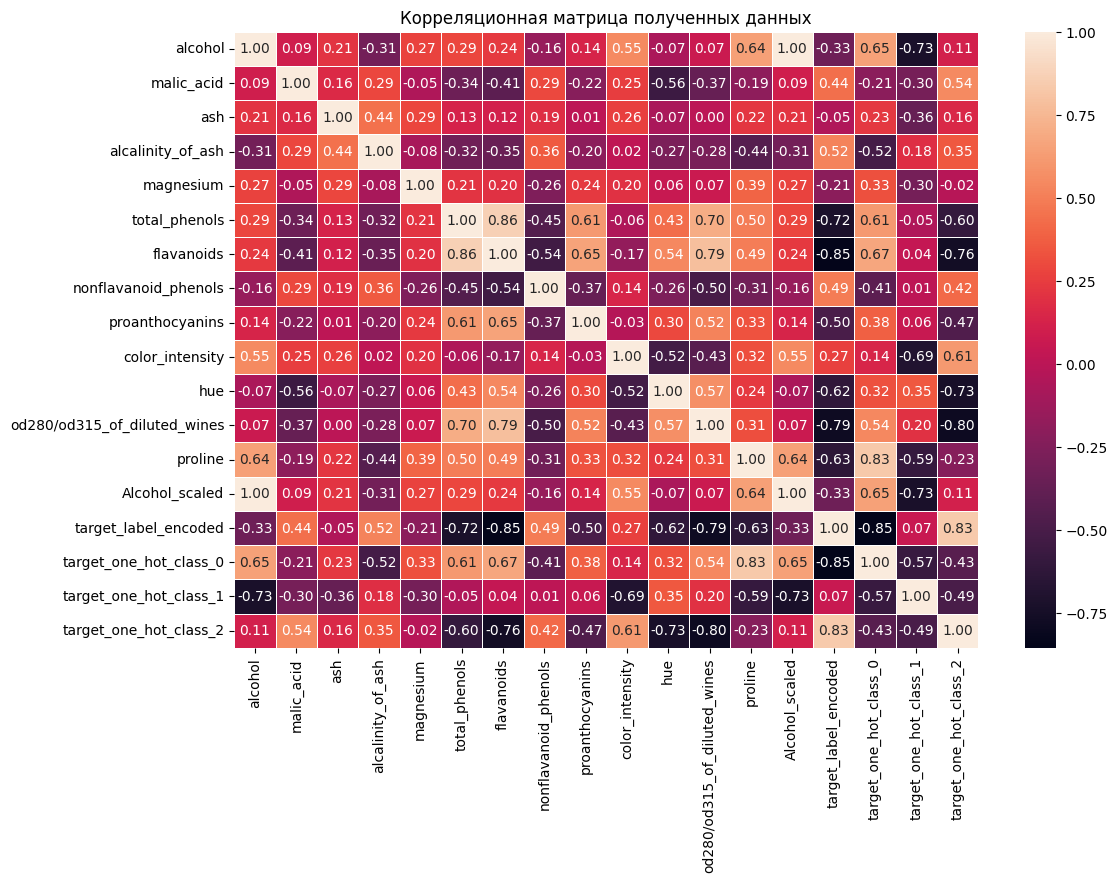

In [302]:

correlation_matrix = df.corr()

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица полученных данных')
plt.show()

Какие методы Вы использовали для решения задачи и почему?


Для решения задачи масштабирования данных я использовал метод масштабирования StandardScaler из библиотеки sklearn.preprocessing. Этот метод преобразует каждый признак таким образом, чтобы его значения находились в заданном диапазоне, обычно между 0 и 1, сохраняя при этом относительные пропорции между значениями признаков. Я выбрал этот метод, потому что он хорошо работает с данными, у которых нет слишком сильных выбросов и нормальное распределение.

Для преобразования категориальных признаков в количественные использовались методы Label Encoding и One Hot Encoding согласно заданию.

Я использовал LabelEncoder() из библиотеки sklearn.preprocessing (Label Encoding), так как этот метод подходит для случаев, когда категориальные значения имеют внутренний порядок, исходя из которого можно выделить численные коды. Он заменяет каждое уникальное значение категориального признака целочисленным кодом.

Я использовал get_dummies() из библиотеки pandas (One Hot Encoding), так как этот метод создает новые бинарные признаки для каждой уникальной категории исходного категориального признака. Это полезно, когда нет явного порядка между значениями категорий или когда необходимо избежать введения нежелательного порядка.